Номер в списке группы: 12

In [208]:
N = 20
cols = ['Daily_Usage_Hours', 'Sleep_Hours', 'Exercise_Hours', 'Screen_Time_Before_Bed', 'Time_on_Social_Media', 'Time_on_Gaming', 'Time_on_Education']
col_name = cols[N % 7]


## I. 
Рассчитайте характеристики:
1. Среднее
2. Дисперсия
3. Мода
4. Медиана
5. Квантили уровня 0.25, 0.5, 0.75
6. Эксцесс
7. Ассиметрия
8. Интерквартильный размах

Построить графики:
1. Гистограмма
2. Эмпирическая функция распределения

Подключение необходимых библиотек

In [209]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import PowerTransformer

Чтение данных

In [210]:
df = pd.read_csv("../datasets/teen_phone_addiction_dataset.csv")

data = df[col_name]
print(col_name)
print(*data)

Time_on_Education
1.2 1.8 0.4 0.8 1.1 1.4 1.0 0.5 1.3 1.0 0.8 1.0 0.4 1.5 0.0 1.8 1.1 0.2 1.3 0.4 2.0 0.9 0.2 1.2 1.1 1.3 1.0 0.9 1.6 0.7 0.5 0.9 2.6 0.0 1.2 1.5 0.0 1.5 0.7 0.0 0.9 0.6 0.0 0.7 0.4 2.0 1.7 0.0 0.0 1.9 1.4 1.0 0.0 2.4 0.6 0.7 0.2 1.3 0.7 1.9 0.9 0.0 1.4 1.6 0.4 1.1 0.6 2.0 0.4 0.5 2.0 0.5 0.8 0.1 1.5 1.1 2.2 0.9 1.2 1.6 0.3 0.0 0.2 1.2 0.0 1.3 0.9 1.3 1.0 0.0 1.5 1.0 0.7 0.7 1.4 0.5 0.3 0.3 0.6 1.0 1.5 1.1 0.3 0.9 0.0 0.9 1.5 0.8 1.6 1.4 1.5 1.3 0.0 1.8 0.8 2.8 1.2 1.5 0.5 1.6 1.3 1.8 1.6 0.7 2.4 1.1 0.7 0.0 0.9 0.2 1.7 0.0 0.7 0.6 1.5 0.0 0.8 0.8 1.4 1.3 3.0 1.4 1.5 2.1 0.3 1.0 1.7 2.2 0.0 2.2 0.3 0.8 0.5 1.9 0.9 1.4 2.4 1.3 0.2 2.3 0.6 1.6 1.6 1.6 1.2 1.8 1.4 1.2 1.6 0.8 0.9 0.0 1.7 1.8 0.0 0.6 1.8 0.8 1.2 0.7 0.0 0.8 0.4 1.6 1.9 0.0 0.8 0.1 0.9 1.8 1.0 1.6 0.8 0.9 1.0 1.2 1.2 1.3 2.0 1.2 0.3 2.6 0.4 1.7 0.9 2.4 3.0 0.0 1.0 1.1 0.8 1.1 2.6 0.2 1.8 0.7 0.7 0.9 0.0 1.3 1.2 0.5 1.0 0.9 1.6 0.2 2.0 2.5 1.3 2.3 1.0 0.4 0.9 0.6 1.9 2.5 0.5 1.3 0.9 0.2 0.5 1.6 0.2 0.0 1.1 0.

Вычисление статистик

In [211]:
mean = data.mean()
variance = data.var(ddof=1)   
mode = data.mode().iloc[0] 
median = data.median()
quantiles = data.quantile([0.25, 0.5, 0.75])
excess_kurtosis = stats.kurtosis(data)  
skewness = stats.skew(data)   
iqr = stats.iqr(data)         

Вывод статистик

In [212]:
print("Среднее:", mean)
print("Дисперсия:", variance)
print("Мода:", mode)
print("Медиана:", median)
print("Квантили:\n", quantiles)
print("Эксцесс:", excess_kurtosis)
print("Асимметрия:", skewness)
print("Интерквартильный размах:", iqr)


Среднее: 1.0163333333333333
Дисперсия: 0.42034667111259316
Мода: 0.0
Медиана: 1.0
Квантили:
 0.25    0.5
0.50    1.0
0.75    1.5
Name: Time_on_Education, dtype: float64
Эксцесс: -0.39997284929065513
Асимметрия: 0.34002789690434665
Интерквартильный размах: 1.0


Визуализация 
Для количества классов реализована формула Стерджесса: bins = 1 + log_2(N)

12.550746785383243


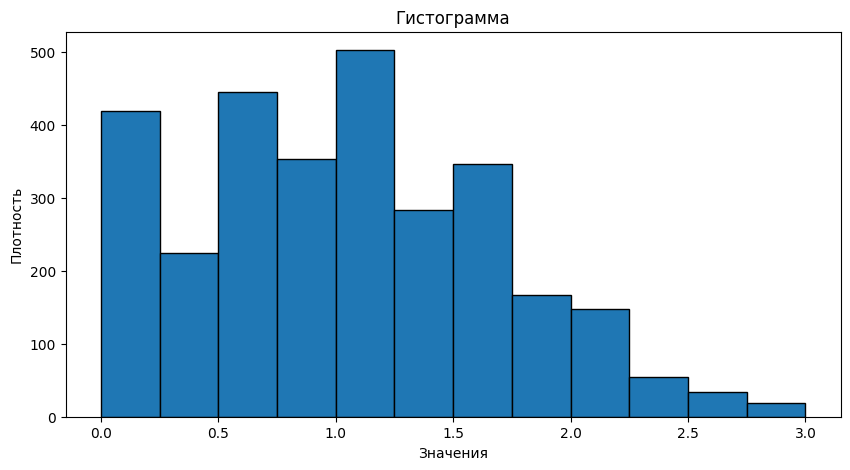

In [213]:
bins_num = 1 + np.log2(len(data))
print(bins_num)
plt.figure(figsize=(10,5))
plt.hist(data, bins=int(bins_num),  edgecolor="black")
plt.title("Гистограмма")
plt.xlabel("Значения")
plt.ylabel("Плотность")
plt.show()

Эмпирическая функция распределения (ЭФР)

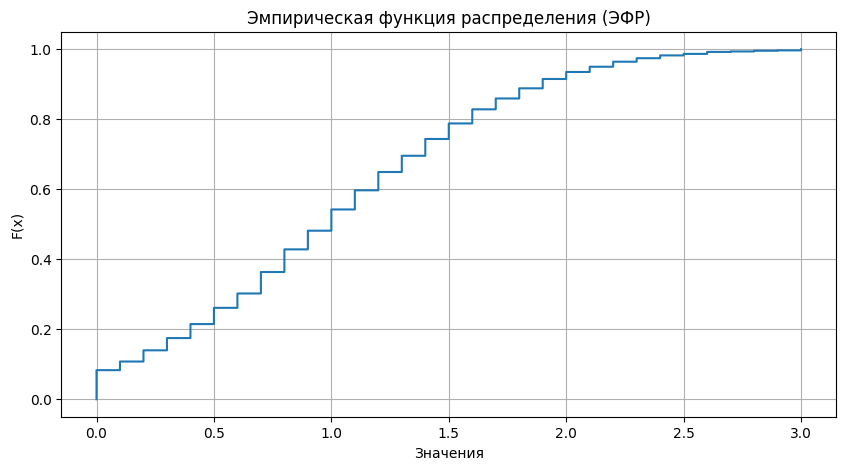

In [214]:
sorted_data = np.sort(data)
y = np.arange(1, len(sorted_data)+1) / len(sorted_data)

plt.figure(figsize=(10,5))
plt.step(sorted_data, y, where="post")
plt.title("Эмпирическая функция распределения (ЭФР)")
plt.xlabel("Значения")
plt.ylabel("F(x)")
plt.grid(True)
plt.show()

## II. 
Проверить данные на нормальность, используя критерии:
1. Хи-квадрат (Реализовать самому, не используя библиотечные варианты!!)
2. Ассиметрии и эксцесса

Построить Q-Q plot

In [215]:
def chi_square_normal_test(data, bins=int(1 + np.log2(len(data))), min_expected=1e-5, min_expected_for_validity=5):
    n = len(data)
    mean = float(np.mean(data))
    std = float(np.std(data, ddof=1))

    counts, bin_edges = np.histogram(data, bins=bins)
    observed = counts.astype(float)

    cdf = stats.norm.cdf(bin_edges, loc=mean, scale=std)
    expected_probs = np.diff(cdf)
    expected = n * expected_probs

    print("n =", n, "mean =", mean, "std =", std)
    print("observed (first 10):", observed[:10])
    print("expected (first 10):", expected[:10])
    print("min(expected) =", expected.min(), "max(expected) =", expected.max())

    mask = expected > min_expected

    obs_masked = observed[mask]
    exp_masked = expected[mask]

    chi2_stat = np.sum((obs_masked - exp_masked)**2 / exp_masked)
    df = obs_masked.size - 1 - 2

    if df <= 0:
        raise RuntimeError(f"Degrees of freedom non-positive: df={df}. Уменьшите число бинов.")

    p_value = stats.chi2.sf(chi2_stat, df=df)

    if np.any(exp_masked < min_expected_for_validity):
        print("Warning: some expected counts < {0}. Consider merging bins to satisfy χ² assumptions.".format(min_expected_for_validity))

    return chi2_stat, int(df), p_value

In [216]:
chi2_stat, df, p_val_chi2 = chi_square_normal_test(data)
print("Хи-квадрат тест:")
print(f"  χ² = {chi2_stat:.3f}, df = {df}, p = {p_val_chi2:.500f}")

n = 3000 mean = 1.0163333333333333 std = 0.6483414772421962
observed (first 10): [420. 225. 446. 354. 503. 283. 347. 167. 148.  54.]
expected (first 10): [180.34890418 282.89286203 383.1306689  448.01428696 452.33342264
 394.31879385 296.79503559 192.87804607 108.22334115  52.4281315 ]
min(expected) = 7.918314031211349 max(expected) = 452.3334226389789
Хи-квадрат тест:
  χ² = 446.232, df = 9, p = 0.00000000000000000000000000000000000000000000000000000000000000000000000000000000000000000183187121679620634752823959552002718034182482215694753089963820793738919325240377041493374896239717084855457665878156098321201407278624137590451176217760769256302537021209126772370413988184308753762552862760812889324983209621278135159627709072083234786987304687500000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000


In [217]:
n = len(data)
skewness = stats.skew(data)
excess_kurtosis = stats.kurtosis(data, fisher=True)



print("\nАсимметрия и эксцесс:")
print(f"  Skewness = {skewness:.3f}")
print(f"  Excess kurtosis = {excess_kurtosis:.3f}")


Асимметрия и эксцесс:
  Skewness = 0.340
  Excess kurtosis = -0.400


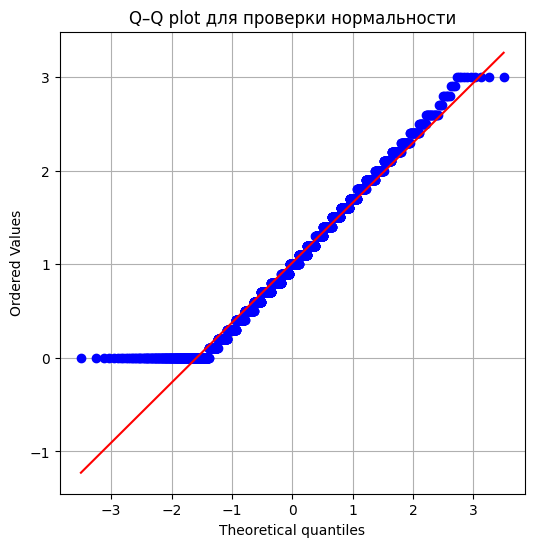

In [218]:
plt.figure(figsize=(6,6))
stats.probplot(data, dist="norm", plot=plt)
plt.title("Q–Q plot для проверки нормальности")
plt.grid(True)
plt.show()

In [219]:
def normality_check(data, label=""):
    chi2_stat, df, p_val_chi2 = chi_square_normal_test(data)
    skewness = stats.skew(data)
    excess_kurtosis = stats.kurtosis(data, fisher=True)
    n = len(data)

    print(f"\n=== Проверка нормальности: {label} ===")
    print(f"Хи-квадрат: χ² = {chi2_stat:.3f}, df = {df}, p = {p_val_chi2:.500f}")
    print(f"Skewness = {skewness:.3f}")
    print(f"Excess kurtosis = {excess_kurtosis:.3f}")

    plt.figure(figsize=(5,5))
    stats.probplot(data, dist="norm", plot=plt)
    plt.title(f"Q–Q plot ({label})")
    plt.grid(True)
    plt.show()

n = 3000 mean = 1.0163333333333333 std = 0.6483414772421962
observed (first 10): [420. 225. 446. 354. 503. 283. 347. 167. 148.  54.]
expected (first 10): [180.34890418 282.89286203 383.1306689  448.01428696 452.33342264
 394.31879385 296.79503559 192.87804607 108.22334115  52.4281315 ]
min(expected) = 7.918314031211349 max(expected) = 452.3334226389789

=== Проверка нормальности: Исходные ===
Хи-квадрат: χ² = 446.232, df = 9, p = 0.00000000000000000000000000000000000000000000000000000000000000000000000000000000000000000183187121679620634752823959552002718034182482215694753089963820793738919325240377041493374896239717084855457665878156098321201407278624137590451176217760769256302537021209126772370413988184308753762552862760812889324983209621278135159627709072083234786987304687500000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
Skewness = 0.340
Excess kurtosis = -0.400


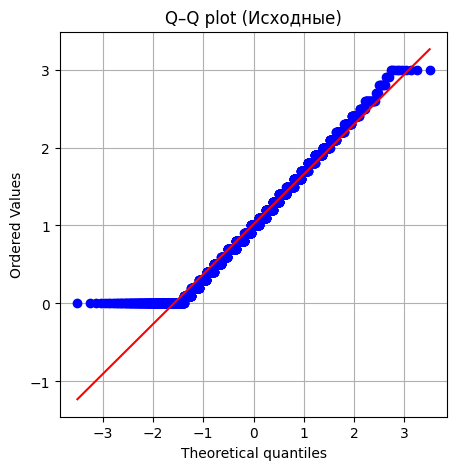

Нижняя и верхняя границы: -1.0 3.0
n = 3000 mean = 1.0163333333333333 std = 0.6483414772421962
observed (first 10): [420. 225. 446. 354. 503. 283. 347. 167. 148.  54.]
expected (first 10): [180.34890418 282.89286203 383.1306689  448.01428696 452.33342264
 394.31879385 296.79503559 192.87804607 108.22334115  52.4281315 ]
min(expected) = 7.918314031211349 max(expected) = 452.3334226389789

=== Проверка нормальности: После удаления выбросов ===
Хи-квадрат: χ² = 446.232, df = 9, p = 0.00000000000000000000000000000000000000000000000000000000000000000000000000000000000000000183187121679620634752823959552002718034182482215694753089963820793738919325240377041493374896239717084855457665878156098321201407278624137590451176217760769256302537021209126772370413988184308753762552862760812889324983209621278135159627709072083234786987304687500000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
Skewness = 0.

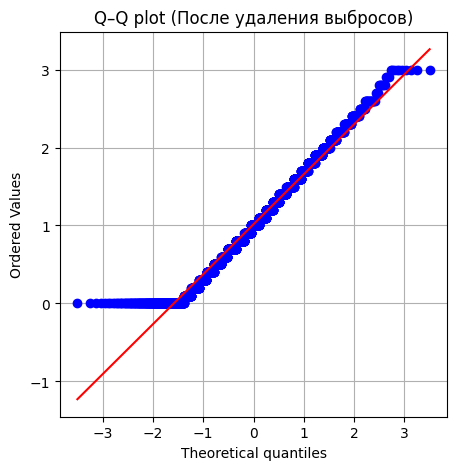

n = 3000 mean = 0.6467893911259495 std = 0.3371411117980555
observed (first 10): [324.  96. 225. 139. 307. 354. 503. 416. 301. 185.]
expected (first 10): [ 90.029624   153.67837998 233.5277736  315.91128763 380.4471556
 407.87512112 389.28186599 330.75387546 250.17768528 168.45869686]
min(expected) = 53.88614404791336 max(expected) = 407.87512111586886

=== Проверка нормальности: После логарифмирования ===
Хи-квадрат: χ² = 821.894, df = 9, p = 0.00000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000411363610936362939448999695289989368390411722195729209104865227019172007359758031745679726720859717626083061811753049235245656668445847259179470200914322941101616758612434126988893498578295016903994447722943246761511989299452610375189261272793325326777386843460655553989721623446438173926051399829601331162047987894048777406791806
Skewness = -0.319
Excess kurtosis = -0.652


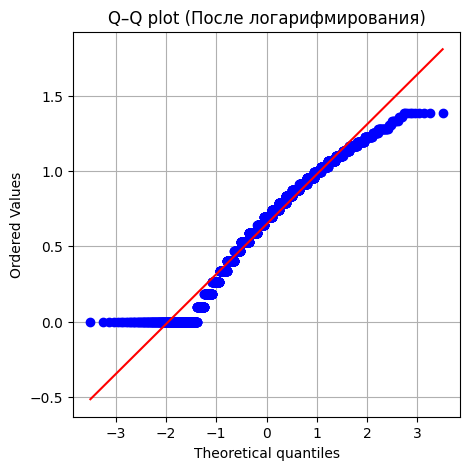

n = 3000 mean = 3.671137468093851e-17 std = 0.9999999999999999
observed (first 10): [420. 225. 446. 354. 503. 283. 347. 167. 148.  54.]
expected (first 10): [180.34890418 282.89286203 383.1306689  448.01428696 452.33342264
 394.31879385 296.79503559 192.87804607 108.22334115  52.4281315 ]
min(expected) = 7.918314031211349 max(expected) = 452.3334226389789

=== Проверка нормальности: После стандартизации ===
Хи-квадрат: χ² = 446.232, df = 9, p = 0.00000000000000000000000000000000000000000000000000000000000000000000000000000000000000000183187121679756584257142888590796236600452015491740401869407847215311366620588878573428388083423709353690907509797763366214947600974763040177105887317996174219637669947861976835930084773852657650101733023954066487515681457137750598462844209279865026473999023437500000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
Skewness = 0.340
Excess kurtosis = -0.400


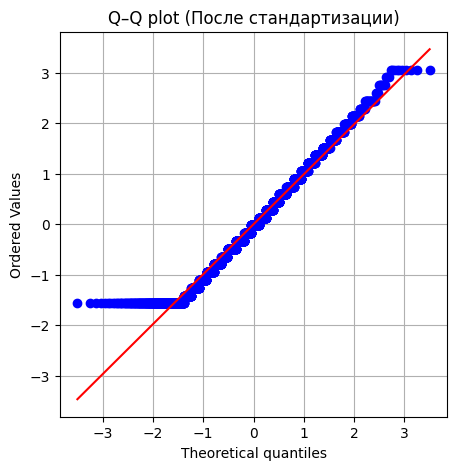

n = 3000 mean = 3.102703279485771e-16 std = 1.0001667083449108
observed (first 10): [324. 201. 259. 307. 354. 503. 283. 347. 227. 118.]
expected (first 10): [123.7157056  203.82376822 295.51366363 377.04736875 423.36188716
 418.33673142 363.77976888 278.3865855  187.47925258 111.10925409]
min(expected) = 26.595230100949664 max(expected) = 423.3618871617926

=== Проверка нормальности: После Yeo–Johnson ===
Хи-квадрат: χ² = 414.666, df = 9, p = 0.00000000000000000000000000000000000000000000000000000000000000000000000000000000001015021473082350335563257033359283149417567006709553140474214746931663521505776604637378896668052224460500573696475738694863702072403620193910504419987444103039301377141784975752155290411467023269784172752328021971379712340421974658966064453125000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
Skewness = -0.035
Excess kurtosis = -0.671


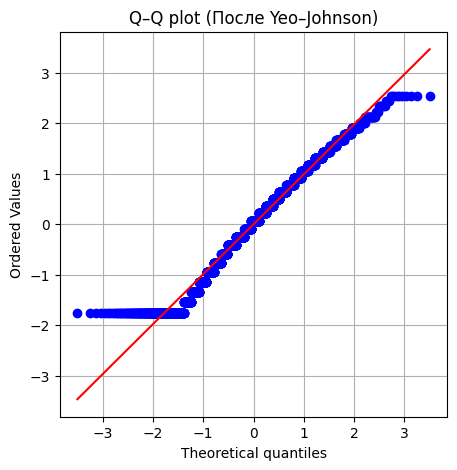

In [ ]:

normality_check(data, label="Исходные")

Q1, Q3 = data.quantile([0.25, 0.75])
IQR = Q3 - Q1
lower, upper = Q1 - 1.5*IQR, Q3 + 1.5*IQR
print("Нижняя и верхняя границы: " + str(lower), str(upper))
data_no_outliers = data[(data >= lower) & (data <= upper)]
normality_check(data_no_outliers, label="После удаления выбросов")

data_log = np.log1p(data_no_outliers)
normality_check(data_log, label="После логарифмирования")

data_std = (data_no_outliers - data_no_outliers.mean()) / data_no_outliers.std(ddof=1)
normality_check(data_std, label="После стандартизации")

pt = PowerTransformer(method='yeo-johnson')
data_transformed = pt.fit_transform(data.values.reshape(-1, 1))
data_transformed = pd.Series(
    data_transformed.flatten(),  
    index=data.index,            
    name=data.name               
)
normality_check(data_transformed, label="После Yeo–Johnson")

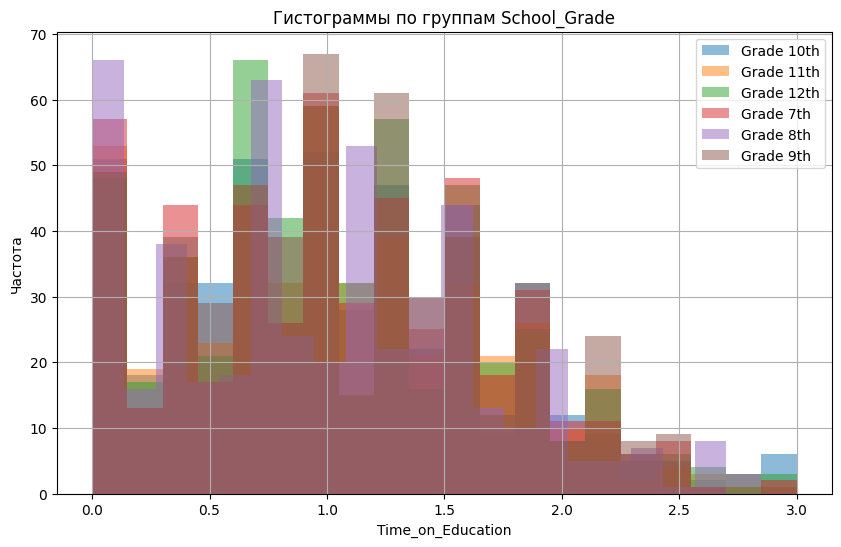

Средние и дисперсии по группам:
                  mean       var  count
School_Grade                           
10th          1.028542  0.448710    487
11th          0.991649  0.409888    479
12th          1.024008  0.400313    529
7th           1.021328  0.418375    497
8th           0.975311  0.423859    482
9th           1.052662  0.422764    526

=== Группа 10th ===
Среднее = 1.029, Дисперсия = 0.449
n = 487 mean = 1.028542094455852 std = 0.6698585086257548
observed (first 10): [69. 64. 77. 80. 69. 53. 44. 15.  7.  9.]
expected (first 10): [37.03602177 59.79530321 79.25678902 86.24633929 77.05168112 56.51419484
 34.02969125 16.82166857  6.82607508  2.27373276]
min(expected) = 2.2737327572097126 max(expected) = 86.24633928909795
χ² = 52.480, df = 7, p = 0.000000004696105712004284211501192004356922127250584253488341346383094787597656250000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

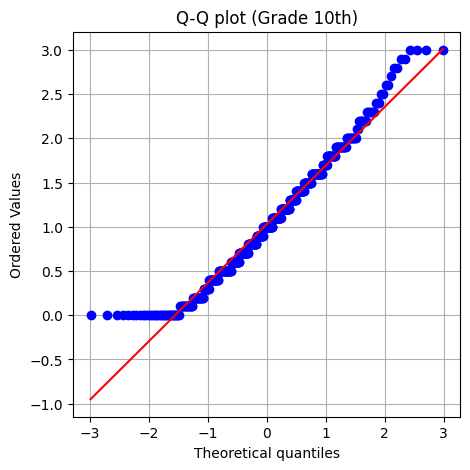

→ Данные НЕ нормальны (по χ²).

=== Группа 11th ===
Среднее = 0.992, Дисперсия = 0.410
n = 479 mean = 0.9916492693110647 std = 0.6402251778899957
observed (first 10): [72. 59. 79. 91. 60. 53. 36. 20.  7.  2.]
expected (first 10): [37.98345323 62.44078142 82.73731002 88.36988778 76.08158608 52.79848551
 29.53359098 13.3150374   4.83805755  1.41666331]
min(expected) = 1.4166633051271211 max(expected) = 88.36988777519197
χ² = 40.279, df = 7, p = 0.00000111310209345734554365952781451731823381123831495642662048339843750000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000


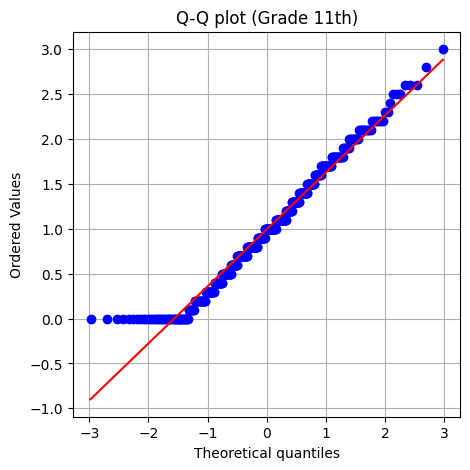

→ Данные НЕ нормальны (по χ²).

=== Группа 12th ===
Среднее = 1.024, Дисперсия = 0.400
n = 529 mean = 1.024007561436673 std = 0.6327026923543264
observed (first 10): [ 65.  57. 108.  91.  73.  67.  33.  21.  10.   4.]
expected (first 10): [38.86380721 66.19506903 90.41999628 99.05457354 87.02810157 61.32169216
 34.65167395 15.70243635  5.70573799  1.66234223]
min(expected) = 1.6623422298677584 max(expected) = 99.05457354334209
χ² = 34.099, df = 7, p = 0.00001650326688057028373321499792325539601733908057212829589843750000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000


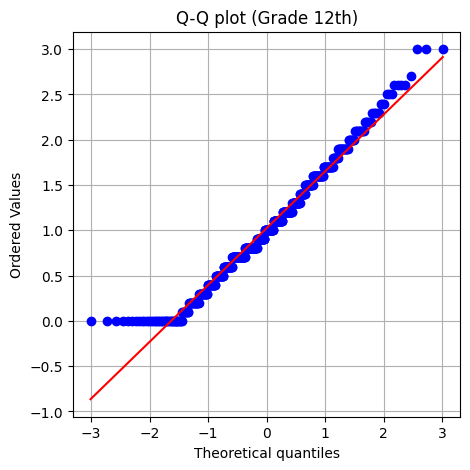

→ Данные НЕ нормальны (по χ²).

=== Группа 7th ===
Среднее = 1.021, Дисперсия = 0.418
n = 497 mean = 1.021327967806841 std = 0.6468190209396205
observed (first 10): [70. 61. 70. 90. 70. 66. 42. 17.  9.  2.]
expected (first 10): [37.38234678 62.13256802 83.59801327 91.05568761 80.28894108 57.31092366
 33.11617283 15.48976202  5.86442224  1.79700519]
min(expected) = 1.797005191852356 max(expected) = 91.05568760732761
χ² = 37.571, df = 7, p = 0.00000365597008719061696750771833785975672981294337660074234008789062500000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000


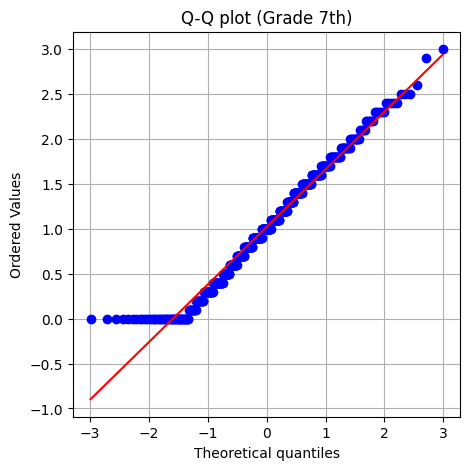

→ Данные НЕ нормальны (по χ²).

=== Группа 8th ===
Среднее = 0.975, Дисперсия = 0.424
n = 482 mean = 0.9753112033195022 std = 0.6510445841571032
observed (first 10): [82. 55. 81. 44. 75. 74. 23. 27. 12.  9.]
expected (first 10): [34.8334104  54.24346831 71.29537907 79.09386105 74.0616759  58.53457279
 39.04767981 21.98540895 10.44768663  4.19024049]
min(expected) = 4.190240488479392 max(expected) = 79.09386105074495
χ² = 98.358, df = 7, p = 0.00000000000000000235485076028440528589165947710223787513429812714798282369255133517071953974664211273193359375000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000


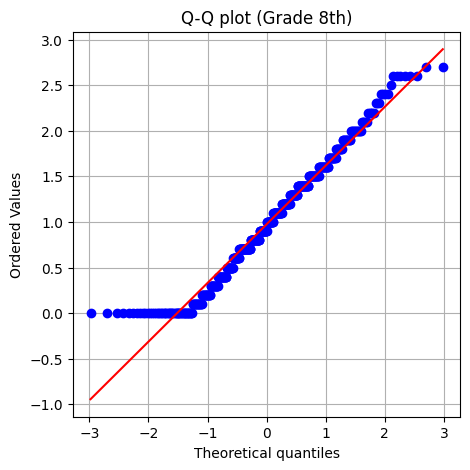

→ Данные НЕ нормальны (по χ²).

=== Группа 9th ===
Среднее = 1.053, Дисперсия = 0.423
n = 526 mean = 1.052661596958175 std = 0.6502032997298154
observed (first 10): [62. 68. 86. 82. 91. 51. 40. 32. 10.  4.]
expected (first 10): [37.2362947  62.92990933 86.27928932 95.96783366 86.60006057 63.39872264
 37.65319904 18.1411414   7.08996999  2.24755768]
min(expected) = 2.2475576770559904 max(expected) = 95.96783366366847
χ² = 34.854, df = 7, p = 0.00001191311520321394666025328207270561620134685654193162918090820312500000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000


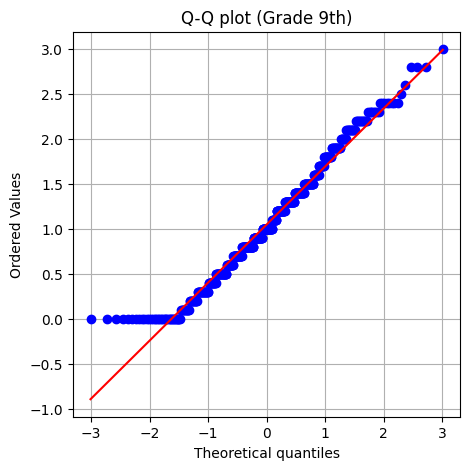

→ Данные НЕ нормальны (по χ²).


In [221]:
df = pd.read_csv("../datasets/teen_phone_addiction_dataset.csv")

groups = df.groupby("School_Grade")

plt.figure(figsize=(10, 6))
for grade, group in groups:
    plt.hist(
        group[col_name],
        bins=20,
        alpha=0.5,
        label=f"Grade {grade}"
    )
plt.title("Гистограммы по группам School_Grade")
plt.xlabel(col_name)
plt.ylabel("Частота")
plt.legend()
plt.grid(True)
plt.show()

stats_by_group = groups[col_name].agg(["mean", "var", "count"])
print("Средние и дисперсии по группам:")
print(stats_by_group)

for grade, group in groups:
    data = group[col_name].dropna()
    mean, var = data.mean(), data.var(ddof=1)

    print(f"\n=== Группа {grade} ===")
    print(f"Среднее = {mean:.3f}, Дисперсия = {var:.3f}")

   

    chi2_stat, df_chi2, p_val_chi2 = chi_square_normal_test(data, bins=10)
    print(f"χ² = {chi2_stat:.3f}, df = {df_chi2}, p = {p_val_chi2:.500f}")

    plt.figure(figsize=(5, 5))
    stats.probplot(data, dist="norm", plot=plt)
    plt.title(f"Q-Q plot (Grade {grade})")
    plt.grid(True)
    plt.show()

    if p_val_chi2 < 0.05:
        print("→ Данные НЕ нормальны (по χ²).")
    else:
        print("→ Данные не противоречат нормальности (по χ²).")